In [2]:
import codecs
import pandas as pd
from pyvi import ViTokenizer
from underthesea import word_tokenize

data_vnexpress = pd.read_csv(codecs.open('filtered_data/vnexpress.csv','r','utf-8'))
data_dantri = pd.read_csv(codecs.open('filtered_data/dantri.csv','r','utf-8'))

In [3]:
type(data_vnexpress)

pandas.core.frame.DataFrame

In [4]:
data_vnexpress.content = data_vnexpress.content.str.replace(pat="(\._)", regex=True,repl="")

data_vnexpress.content = data_vnexpress.content.str.replace(pat="(\d*)", regex=True,repl="")

data_vnexpress.content = data_vnexpress.content.str.replace(pat="(\s+[a-zA-Z]\s+)", regex=True,repl=" ")

data_vnexpress.content = data_vnexpress.content.str.replace(pat="(\W)", regex=True,repl=" ")

data_vnexpress.content = data_vnexpress.content.str.replace(pat=r"(\s+)", regex=True,repl=" ")

data_vnexpress.content = data_vnexpress.content.str.lower()

data_vnexpress.to_csv("train_data/vnexpress.csv",index=False)

In [5]:
data_dantri.content = data_dantri.content.str.replace(pat="(\._)", regex=True,repl="")

data_dantri.content = data_dantri.content.str.replace(pat="(\d*)", regex=True,repl="")

data_dantri.content = data_dantri.content.str.replace(pat="(\s+[a-zA-Z]\s+)", regex=True,repl=" ")

data_dantri.content = data_dantri.content.str.replace(pat="(\W)", regex=True,repl=" ")

data_dantri.content = data_dantri.content.str.replace(pat=r"(\s+)", regex=True,repl=" ")

data_dantri.content = data_dantri.content.str.lower()

data_dantri.to_csv("train_data/data_dantri.csv",index=False)

In [10]:
labels = [
('Chinh tri Xa hoi', 0),
('Cong Nghe', 1),
('Doi Song', 2),
('Du Lich', 3),
('Giai Tri', 4),
('Giao Duc', 5),
('Khoa hoc', 6),
('Kinh doanh', 7),
('Phap Luat ', 8),
('Suc Khoe', 9),
('The Gioi', 10),
('The Thao', 11),
('Xe', 12),
]

In [11]:
import pandas as pd
from model.svm_model import SVMModel
import codecs
from sklearn.model_selection import train_test_split  

data = pd.read_csv(
    codecs.open('train_data/data_dantri.csv', 'r', 'utf-8'))
data = data.append(pd.read_csv(
    codecs.open('train_data/vnexpress.csv', 'r', 'utf-8')),ignore_index=True)

data = data.loc[data.sample(frac=1).groupby('label').cumcount() <= 1500]
         
X, y = data.content, data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = SVMModel()
for label, idx in labels:
    print('%s: %d' % (label,len(data[data.label == idx])))
clf = model.clf.fit(X_train,y_train)
for label, idx in labels:
    print('%s: %d' % (label,len(y_train[y_train == idx])))
clf = model.clf.fit(X_train,y_train)

Chinh tri Xa hoi: 1501
Cong Nghe: 1501
Doi Song: 1501
Du Lich: 1501
Giai Tri: 1501
Giao Duc: 1501
Khoa hoc: 1149
Kinh doanh: 1501
Phap Luat : 1501
Suc Khoe: 1501
The Gioi: 1501
The Thao: 1501
Xe: 1028
Chinh tri Xa hoi: 1204
Cong Nghe: 1185
Doi Song: 1212
Du Lich: 1210
Giai Tri: 1182
Giao Duc: 1190
Khoa hoc: 932
Kinh doanh: 1215
Phap Luat : 1190
Suc Khoe: 1192
The Gioi: 1187
The Thao: 1219
Xe: 832


In [12]:
y_pred = clf.predict(X_test)  


In [13]:
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[214   0  15  19   0   3   1   8  26   4   5   1   1]
 [  3 267   5   3   4   7   0  12   5   1   5   4   0]
 [ 11   1 190  22   5  18   1  22   2  16   0   1   0]
 [  3   0   8 256   2   2   3   4   2   1   4   6   0]
 [  4   2  12  10 270   2   1   1   2   7   1   7   0]
 [  2   0  12   1   1 283   0   1   3   4   3   1   0]
 [  0   4   5   9   0  13 129  12   0  30  12   0   3]
 [ 25   9  20  12   0   3   0 196   1   4   5   2   9]
 [ 14   0   0   0   0   3   0   2 286   1   4   0   1]
 [  3   1   9   2   4   3   1   2   2 280   0   1   1]
 [  0   0  12  10   5   4   2  12   7   3 256   2   1]
 [  0   0   2   0   0   1   0   0   0   2   1 275   1]
 [  5   3   4   2   0   1   0   8   0   1   1   1 170]]
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74       297
         1.0       0.93      0.84      0.89       316
         2.0       0.65      0.66      0.65       289
         3.0       0.74      0.88      0.80       291
         4.0 

In [34]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax




Confusion matrix, without normalization
[[173   0  12  12   1   3   0   9  23   4   6   1   0]
 [  1 213   8   0   2   9   2   8   5   0   4   6   0]
 [  7   4 161  30   9   7   1  14   4  21   4   0   3]
 [  3   0   4 201   5   0   5   3   0   1   5   1   0]
 [  2   0  11  11 192   2   0   1   1   3   0   2   0]
 [  2   0   2   1   1 209   2   1   3   1   1   1   0]
 [  1   3   4   8   2  16 144   7   1  30   4   0   3]
 [  7   9  12   6   0   5   2 171   4   4   5   2  11]
 [  6   2   2   2   0   4   0   0 212   0   1   0   1]
 [  7   1   8   1   1   2   5   0   0 216   0   1   1]
 [  3   0   4  11   1   4   2   3   8   2 216   1   0]
 [  0   0   1   1   1   2   0   0   0   0   0 254   0]
 [  4   1   3   0   0   0   0   2   1   1   1   0 173]]


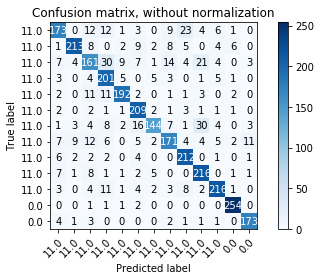

In [35]:
np.set_printoptions(precision=5)
class_names = data_dantri.label

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()